# Post Analysis 3 - 2022 TOP 5 counties in Google mobility index  

In this notebook, I analyze the forecasted data. I find the TOP 5 counties in terms of Google mobility index and plot them on a map using Geo Pandas.  


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

First, I load my mobility forecast data. 

In [2]:
# Read forecast data
df = pd.read_csv ('Data/mobility_forecast_optimistic.csv')      

# Creat year column
df['year']=df.date.astype(str).str[:4]


df.head()

,countyfips,date,mobility,yoy_change,year,month,yearmonth,day,Date
0,11001,2020-02-24 00:00:00,-221.5,NaN,2020,2.0,2020-02,24.0,2020-02-24
1,24009,2020-02-24 00:00:00,-119.5,NaN,2020,2.0,2020-02,24.0,2020-02-24
2,24017,2020-02-24 00:00:00,214.0,NaN,2020,2.0,2020-02,24.0,2020-02-24
3,24021,2020-02-24 00:00:00,143.0,NaN,2020,2.0,2020-02,24.0,2020-02-24
4,24031,2020-02-24 00:00:00,-21.5,NaN,2020,2.0,2020-02,24.0,2020-02-24


Next, I load US county shape file for Geo Panda.  

In [3]:
county = gpd.read_file("Shape/US_County_Boundaries/US_County_Boundaries.shp")
county.CTFIPS = county.CTFIPS.astype('int')
county.head()

,STFIPS,CTFIPS,STATE,COUNTY,VERSION,Shape_Leng,Shape_Area,geometry
0,02,2016,Alaska,Aleutians West,05,62.576763,1.540013,"MULTIPOLYGON (((-170.34620 57.21312, -170.3328..."
1,02,2290,Alaska,Yukon-Koyukuk,05,63.135667,74.225260,"POLYGON ((-147.99746 64.34170, -148.04161 64.3..."
2,02,2185,Alaska,North Slope,05,130.327563,52.678634,"MULTIPOLYGON (((-149.74913 70.49325, -149.7479..."
3,02,2188,Alaska,Northwest Arctic,05,88.348799,19.328173,"MULTIPOLYGON (((-162.52343 66.04237, -162.5296..."
4,02,2240,Alaska,Southeast Fairbanks,05,21.362151,11.848211,"POLYGON ((-146.48418 63.17392, -146.48920 63.2..."


Next I merge county shape file to my Geo IDs data to drop counties outside of Washington DC Metro Area.

In below, I load my Geo IDs data.

In [4]:
# Read Geo Data 
df_g = pd.read_csv('Data/df_geo.csv')
# Include only Washington DC metro area 
cz = df_g[['countyname', 'countyfips', 'stateabbrev']][df_g.czname=='Washington DC']
# Adjust columns names and data type 
cz.rename(columns={'countyfips':'CTFIPS'}, inplace=True)
cz.CTFIPS = cz.CTFIPS.astype('int')

Next, I merge county shape file to Geo IDs data and drop counties outside of Washington DC Metro Area.

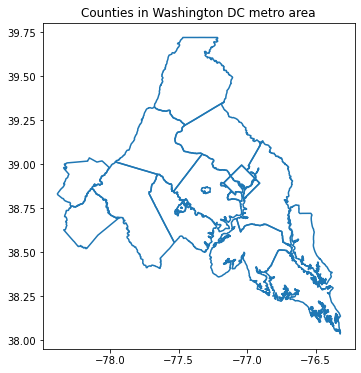

In [5]:
map_county = county.merge(cz, on = 'CTFIPS', how='inner')
map_county.drop_duplicates(inplace=True)
map_county.boundary.plot(figsize=(6,6))
plt.title('Counties in Washington DC metro area');

Now I have a county shape file which includes only Washington DC metro area as above.

Next, I merge the county shape file with mobility forecast data to plot on a map.


In [6]:
df_map = map_county.merge(df, left_on='CTFIPS', right_on='countyfips', how ='outer')


Next, I plot the TOP 5 counties in terms of mobility changes.

For this purpose, I calculate the average mobility changes by year and create a new data frame for 2022 mobility changes.

In [7]:
# Take Average  
df_month= df_map.groupby(['countyfips', 'yearmonth']).mean()

df_month.reset_index(inplace=True)

# Merge with county map shape file 
df_month = map_county.merge(df_month, left_on='CTFIPS', right_on='countyfips', how ='inner')

# create data frame for 2022 forecasted revenue changes 
dfm22 = df_month[df_month.yearmonth=='2022-12']
dfm22.drop_duplicates(inplace=True)

I plot TOP 5 counties in terms of mobility changes in 2022

In [8]:
# Get top 5 county names from the 2022 forecast data 

top5 = dfm22.sort_values('mobility', ascending=False).head(5)
top5[['STATE', 'COUNTY']]

,STATE,COUNTY
330,Virginia,Fairfax
34,Maryland,Frederick
219,Virginia,Fauquier
515,Maryland,Calvert
71,Maryland,Montgomery


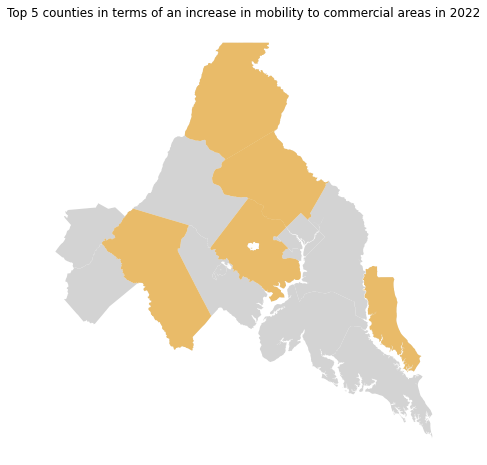

In [9]:
# Map TOP5 
fig, ax = plt.subplots(figsize = (8,8))
map_county.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
top5.plot(ax=ax, color='orange', alpha=0.5)
ax.set_title('Top 5 counties in terms of an increase in mobility to commercial areas in 2022')
ax.axis("off");

The above counties are promising neighborhoods in 2022 in terms of mobility! 